In [4]:
import numpy as np
import math as mp
import pandas as pd

In [5]:
import numpy as np

def generate_pattern_array_with_extra_rows(tau):
    # 1) Create the original n×n pattern
    n = len(tau)+ int(np.min(tau))
    m = int(np.max(tau)) + int(np.min(tau))

    mx = int(max(tau))
    missing_count = len(set(range(int(max(tau) )+ 1)) - set(tau))
    print(missing_count)


    A = np.ones((m+2, n+missing_count), dtype=float)
    count = 0
    for i in range(1, m+2):
        for j in range(len(tau[tau == i-1])):
            A[i, n- i-j - count] = 0.95  # 0.9 shifts diagonally from right to left as we go down
        if len(tau[tau == i-1]) > 1:
            count += len(tau[tau == i-1])-1
    # 2) Create the two extra rows:
    #    (a) one row with 0.9 at the leftmost column,
    #    (b) one row of all ones.

    row_all_ones = np.ones(n+missing_count, dtype=float)
    A_extended = np.vstack([A,row_all_ones])
    A_extended = A_extended[:,0:n - int(np.min(tau))]

    return A_extended

In [6]:
# Some parameter initialization. 
sigma = 5
beta = 0.8
W = 1
n=np.linspace(10,0,11)
A = 1

In [7]:


# Example usage:
discount= generate_pattern_array_with_extra_rows(n)

df = pd.DataFrame(discount)
df

0


,0,1,2,3,4,5,6,7,8,9,10
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.95
2,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.95,1.00
3,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00
4,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00
5,1.00,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00
6,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00
7,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,1.00
8,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,1.00,1.00
9,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [8]:
beta_list = beta * discount

In [17]:
(1-beta_list)/beta_list

array([[0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.31578947],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      , 0.25      , 0.31578947,
        0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      , 0.31578947, 0.25      ,
        0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.31578947, 0.25      , 0.25      ,
        0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.31578947, 0.25      , 0.25      , 0.25      ,
        0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.

In [9]:
np.shape(beta_list)

(13, 11)

In [10]:
prod_beta_list = np.zeros_like(beta_list)
prod_beta_list[0,:] = beta**n 
prod_beta_list[1,:] = beta**n 
for i in range(2, len(beta_list)-1):
    prod_beta_list[i,:] = beta**n
    prod_beta_list[i,int(np.max(n))-i+1] = beta**(i-1) * 0.95
prod_beta_list[-1,:] = beta**n

In [11]:
df = pd.DataFrame(prod_beta_list)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.107374,0.134218,0.167772,0.209715,0.262144,0.327680,0.40960,0.5120,0.640,0.80,1.0
1,0.107374,0.134218,0.167772,0.209715,0.262144,0.327680,0.40960,0.5120,0.640,0.80,1.0
2,0.107374,0.134218,0.167772,0.209715,0.262144,0.327680,0.40960,0.5120,0.640,0.76,1.0
3,0.107374,0.134218,0.167772,0.209715,0.262144,0.327680,0.40960,0.5120,0.608,0.80,1.0
4,0.107374,0.134218,0.167772,0.209715,0.262144,0.327680,0.40960,0.4864,0.640,0.80,1.0
5,0.107374,0.134218,0.167772,0.209715,0.262144,0.327680,0.38912,0.5120,0.640,0.80,1.0
6,0.107374,0.134218,0.167772,0.209715,0.262144,0.311296,0.40960,0.5120,0.640,0.80,1.0
7,0.107374,0.134218,0.167772,0.209715,0.249037,0.327680,0.40960,0.5120,0.640,0.80,1.0
8,0.107374,0.134218,0.167772,0.199229,0.262144,0.327680,0.40960,0.5120,0.640,0.80,1.0
9,0.107374,0.134218,0.159384,0.209715,0.262144,0.327680,0.40960,0.5120,0.640,0.80,1.0


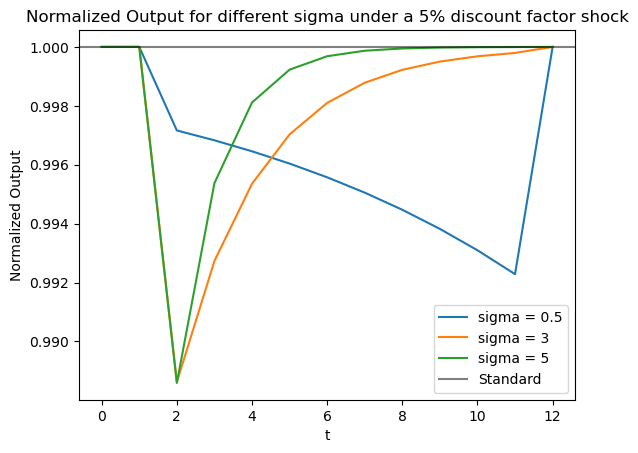

In [12]:
import matplotlib.pyplot as plt
for sigma in [0.5,3, 5]:
    tprod1 = prod_beta_list
    P0 = (np.sum(1/(tprod1)**(1-sigma),axis =1))**(1/(1-sigma))


    plt.plot( (1/P0)*P0[0], label=f'sigma = {sigma}')  
plt.axhline(y=1, color='k',  alpha=0.5, label='Standard') 
plt.xlabel('t')
plt.ylabel('Normalized Output')
plt.legend()
plt.title('Normalized Output for different sigma under a 5% discount factor shock')
plt.show()